## EDA

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

=== Missing Values (Jumlah) ===
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_inc

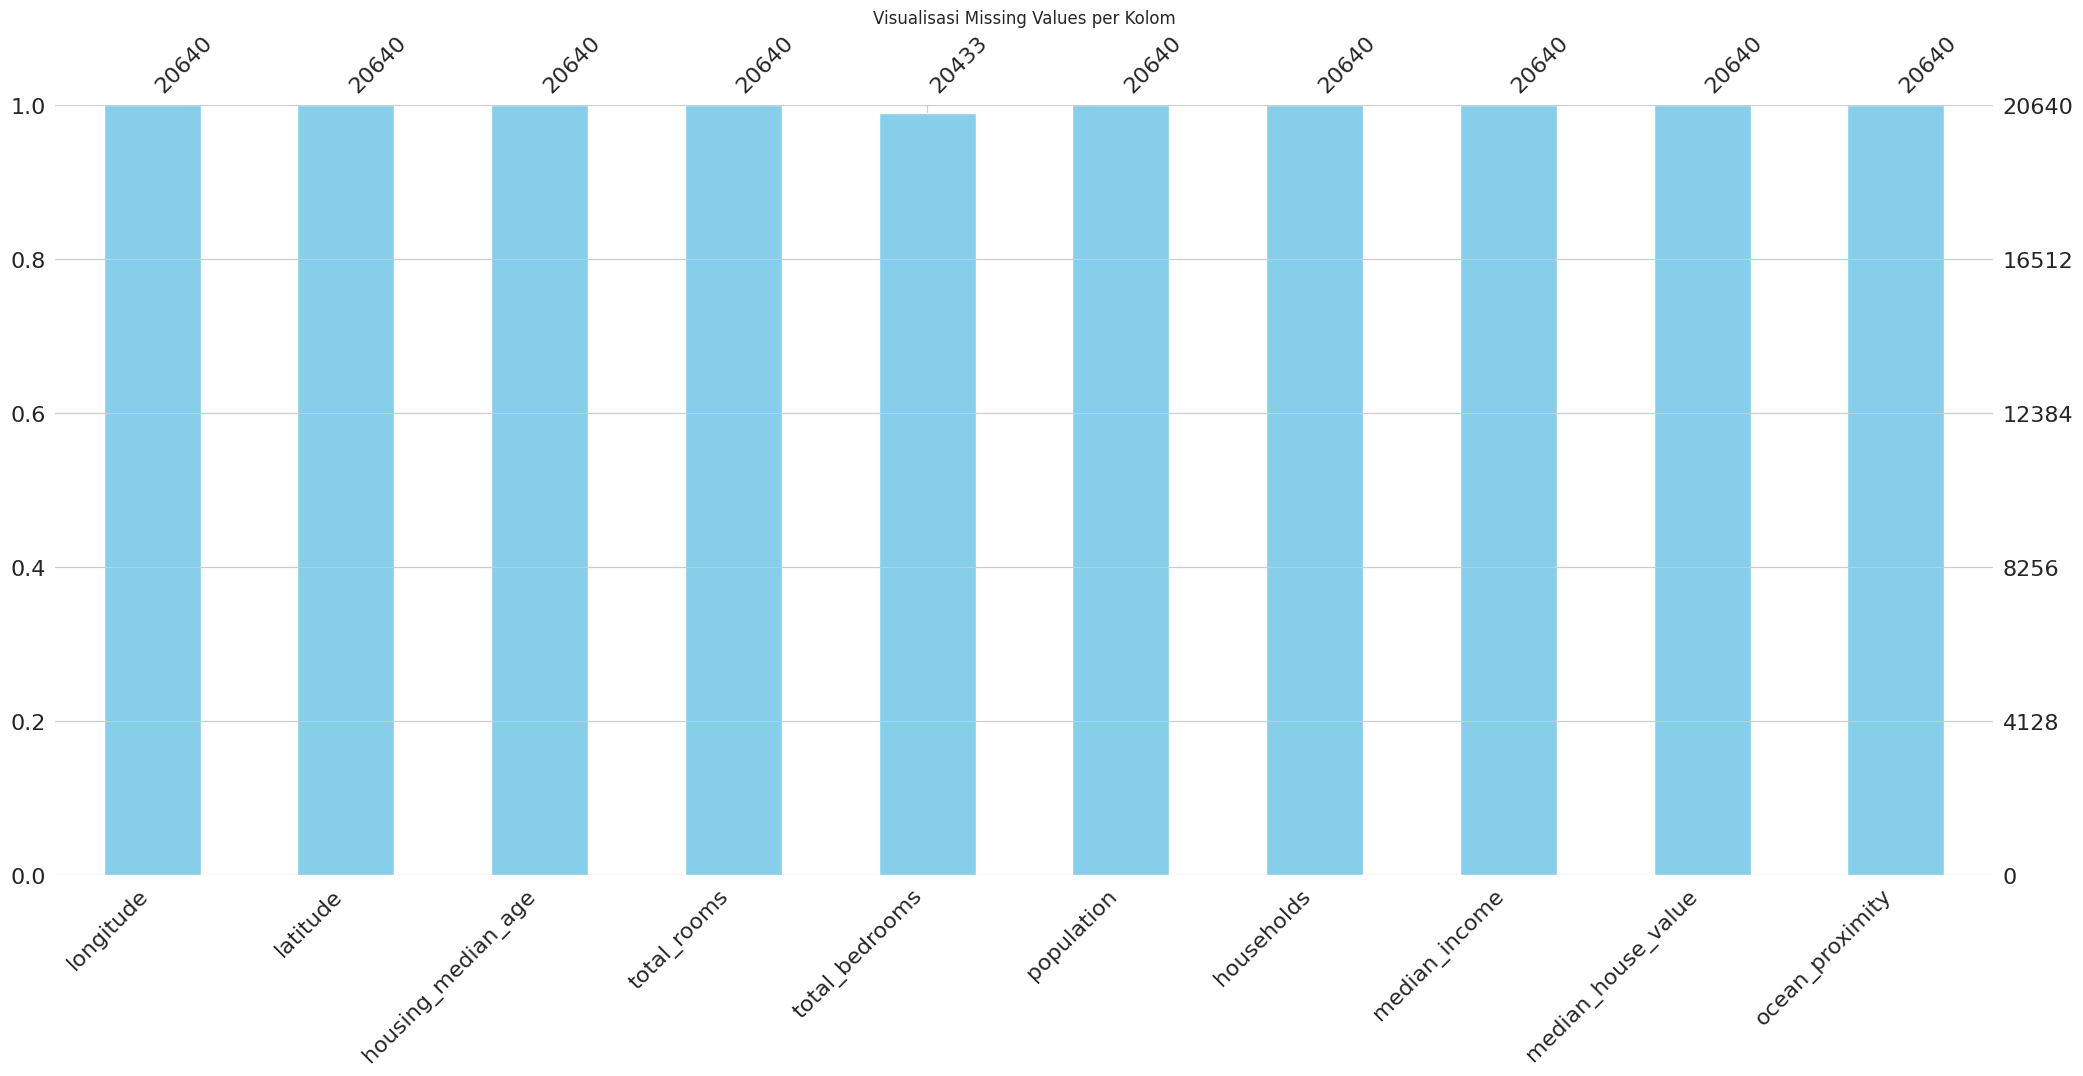


=== Statistik Deskriptif (numerik) ===
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.00000

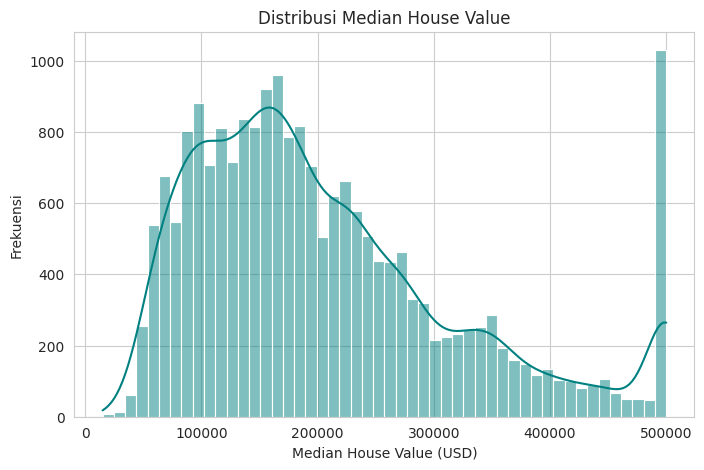

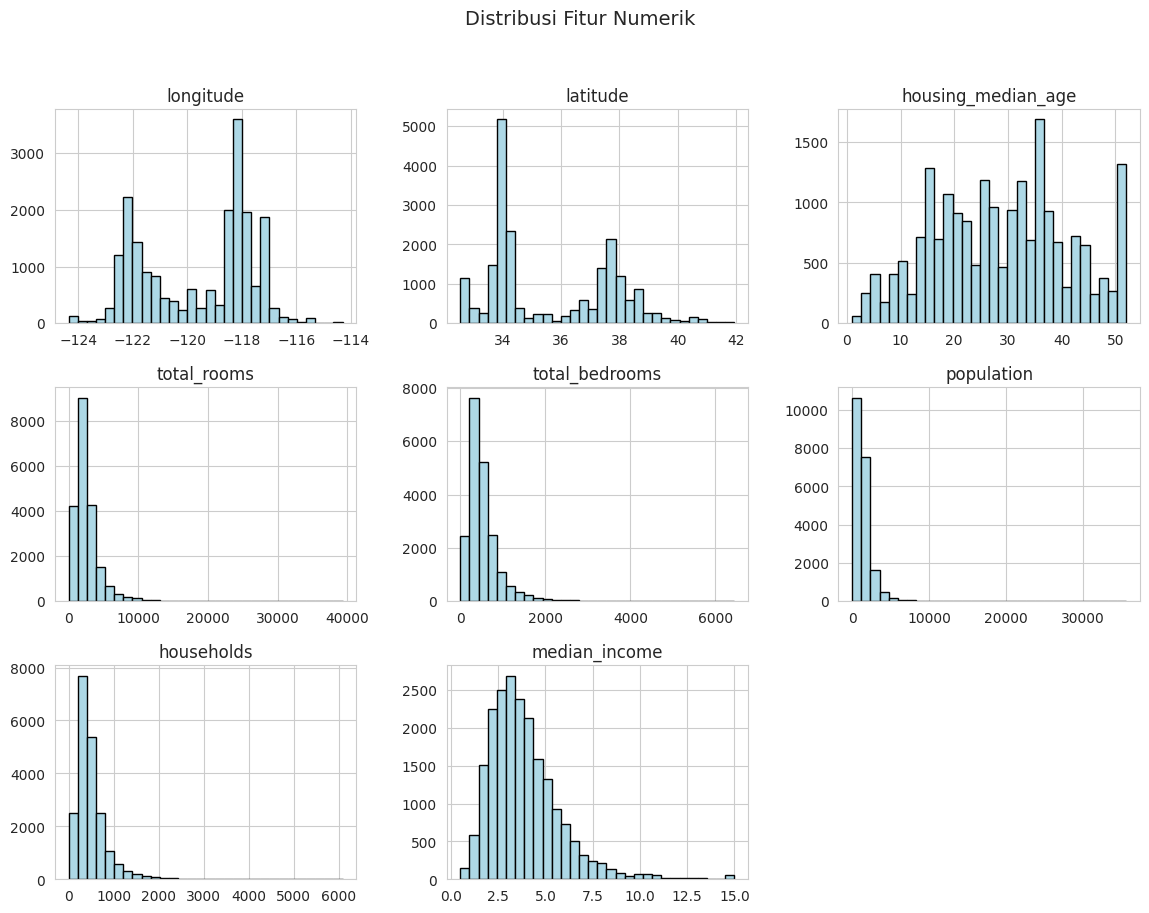

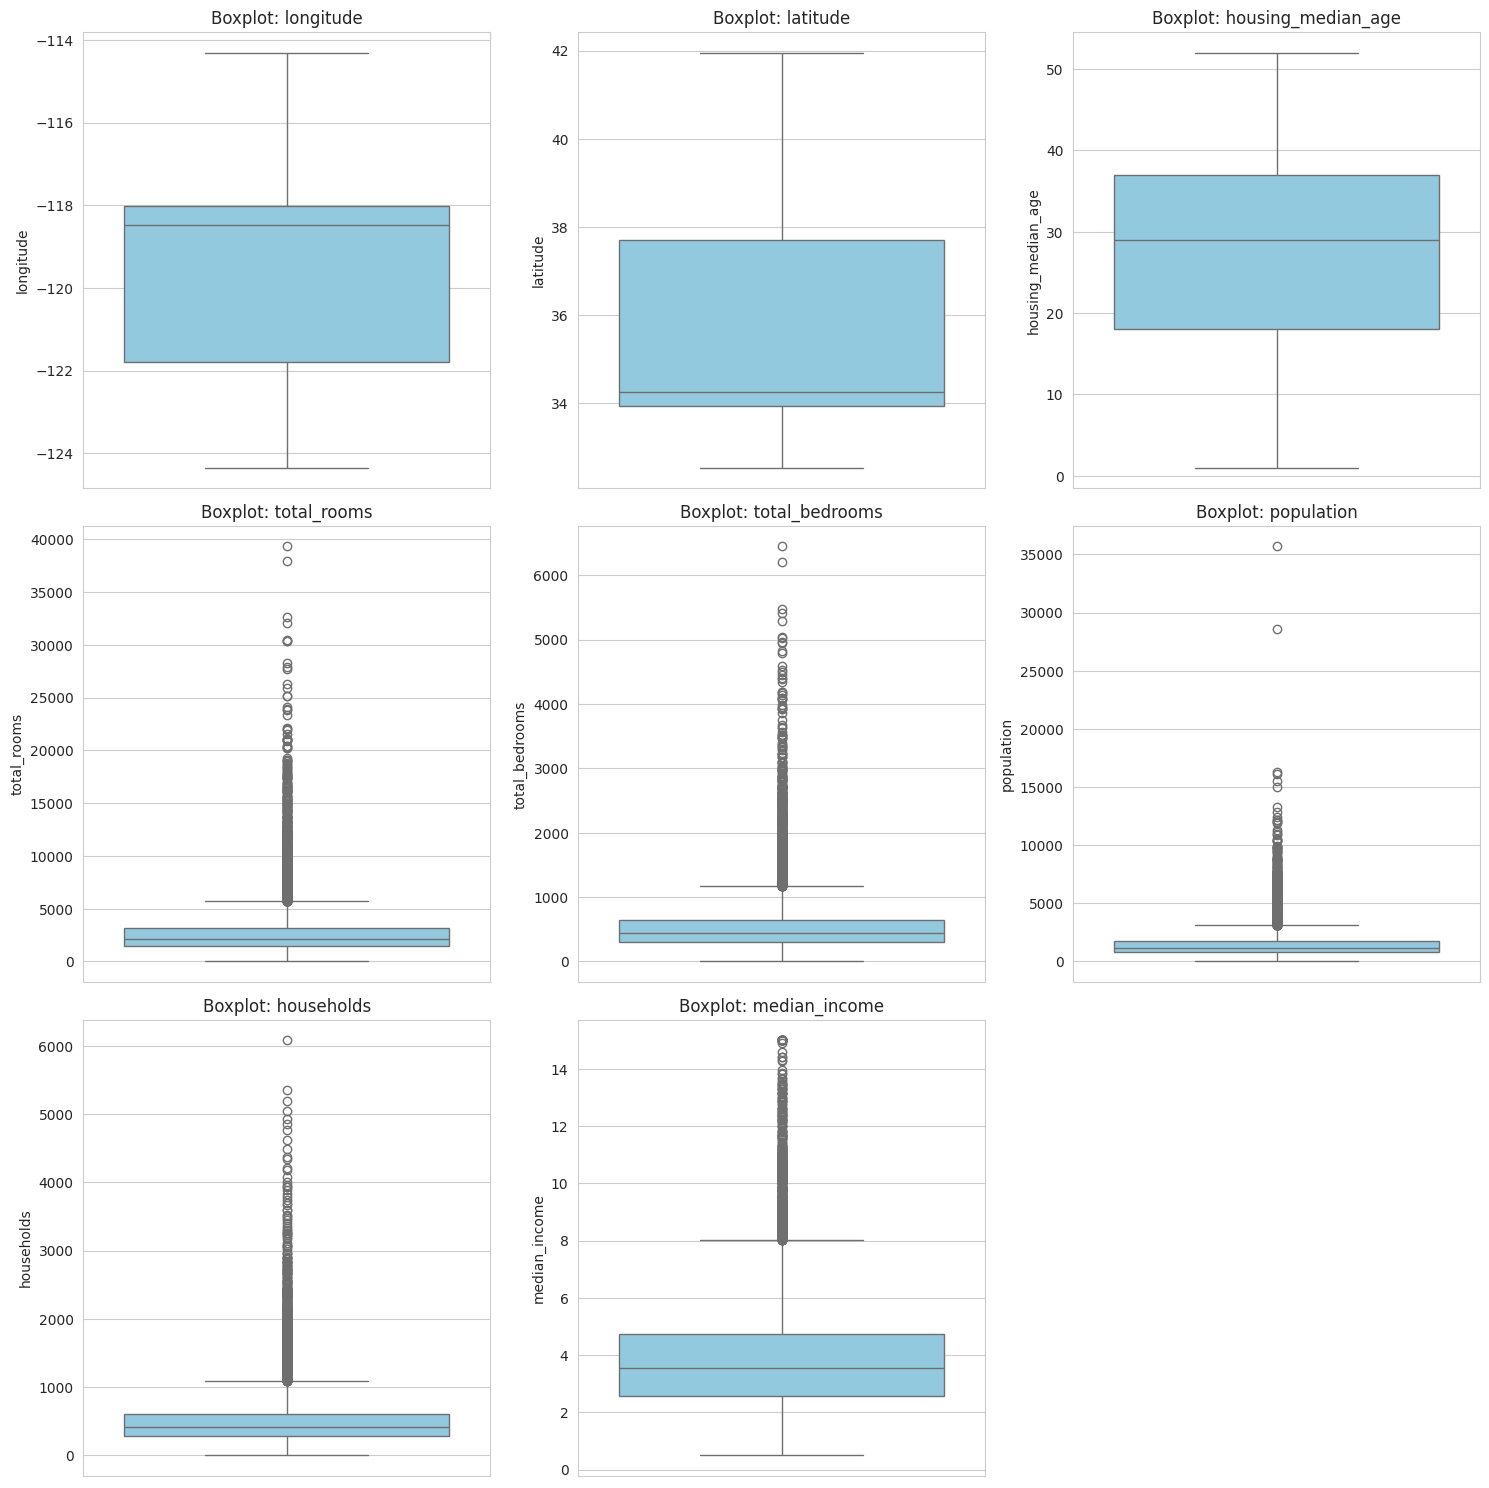

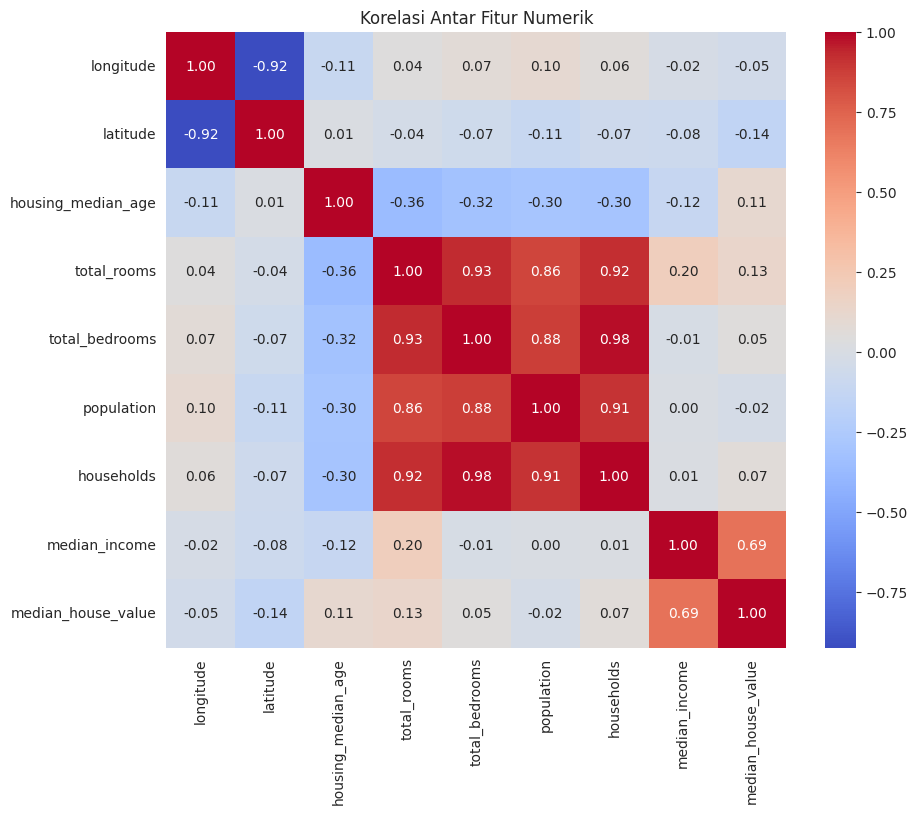

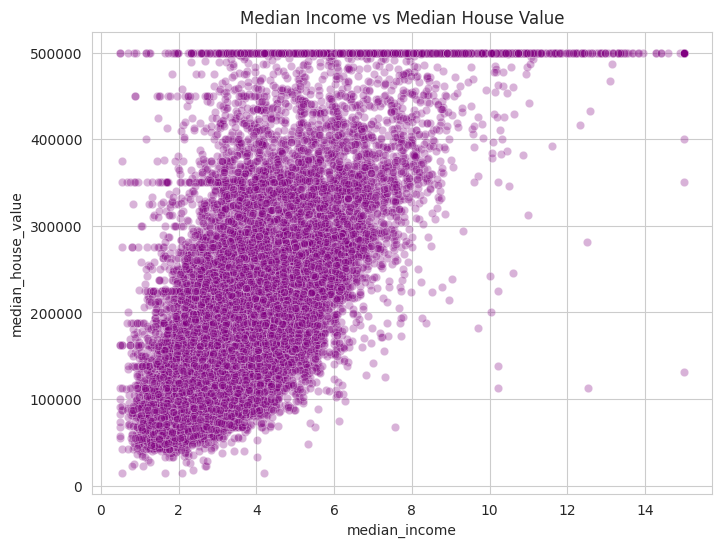

/tmp/ipykernel_37701/4093920438.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="ocean_proximity", y="median_house_value", data=df, palette="Set2")


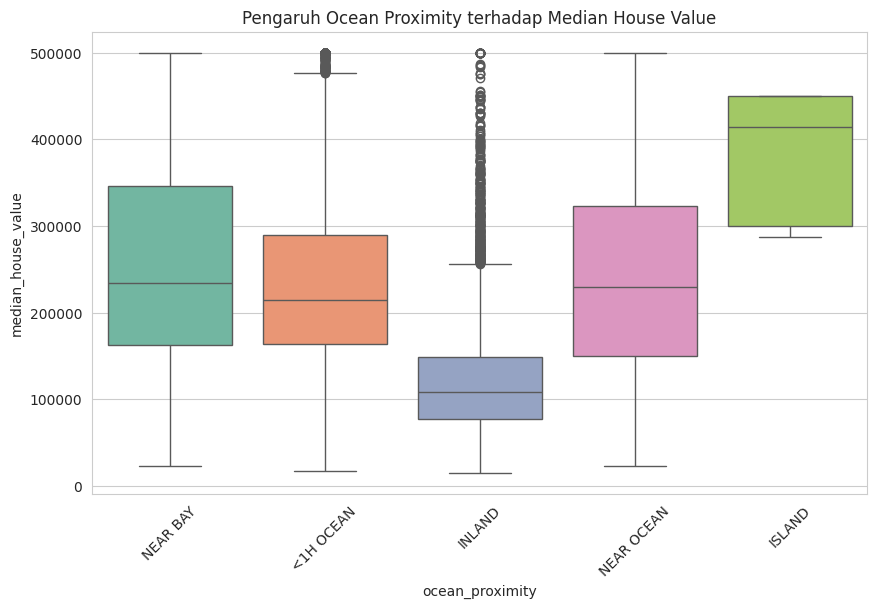

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # untuk visualisasi missing values

# Style seaborn
sns.set_style("whitegrid")

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Info dataset
print("=== Info Dataset ===")
print(df.info())

print("\n=== Missing Values (Jumlah) ===")
print(df.isnull().sum())

# Visualisasi missing values
plt.figure(figsize=(8,4))
msno.bar(df, color="skyblue")
plt.title("Visualisasi Missing Values per Kolom")
plt.show()

# 3. Statistik deskriptif
print("\n=== Statistik Deskriptif (numerik) ===")
print(df.describe())

# 4. Distribusi target: median_house_value
plt.figure(figsize=(8,5))
sns.histplot(df["median_house_value"], bins=50, kde=True, color="teal")
plt.title("Distribusi Median House Value")
plt.xlabel("Median House Value (USD)")
plt.ylabel("Frekuensi")
plt.show()

# 5. Distribusi fitur numerik
num_features = df.select_dtypes(include=["float64", "int64"]).columns.drop("median_house_value")

df[num_features].hist(bins=30, figsize=(14,10), color="lightblue", edgecolor="black")
plt.suptitle("Distribusi Fitur Numerik", fontsize=14)
plt.show()

# 6. Boxplot untuk deteksi outlier pada numerik
# Hitung jumlah fitur numerik
n_features = len(num_features)

# Tentukan jumlah baris & kolom otomatis (contoh: 3 kolom)
n_cols = 3
n_rows = (n_features // n_cols) + int(n_features % n_cols != 0)

# Buat subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, feature in enumerate(num_features):
    r, c = divmod(i, n_cols)
    sns.boxplot(y=df[feature], ax=axes[r, c], color="skyblue")
    axes[r, c].set_title(f"Boxplot: {feature}")

# Hapus subplot kosong (jika ada)
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


# 7. Korelasi antar fitur numerik dengan target
plt.figure(figsize=(10,8))
corr = df[num_features.tolist() + ["median_house_value"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

# 8. Scatter plot: median_income vs median_house_value
plt.figure(figsize=(8,6))
sns.scatterplot(x="median_income", y="median_house_value", data=df, alpha=0.3, color="purple")
plt.title("Median Income vs Median House Value")
plt.show()

# 9. Boxplot: ocean_proximity vs median_house_value
plt.figure(figsize=(10,6))
sns.boxplot(x="ocean_proximity", y="median_house_value", data=df, palette="Set2")
plt.title("Pengaruh Ocean Proximity terhadap Median House Value")
plt.xticks(rotation=45)
plt.show()


# Eksperimen Bragging

### A. Eksperimen Bagging 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Fitur & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Identifikasi fitur kategorikal & numerik
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

# 4. Preprocessing (OneHotEncoder untuk kategori)
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
], remainder="passthrough")

# 5. Model pipeline: Preprocessing + Decision Tree
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

# 6. Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Training
model.fit(X_train, y_train)

# 8. Prediksi
y_pred = model.predict(X_test)

# 9. Evaluasi performa
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("=== Baseline: Decision Tree Regressor ===")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")


=== Baseline: Decision Tree Regressor ===
MAE : 43375.4758
MSE : 4700291228.0921
R²  : 0.6413


### Bagging Implementations

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Feature & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Identify categorical & numerical features
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

# 4. Preprocessor
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
], remainder="passthrough")

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Hyperparameter variations
n_estimators_list = [50, 100, 200, 300, 500]
max_depth_list = [1, 3, 5, 8, 10]

results = []

for n_est in n_estimators_list:
    for depth in max_depth_list:
        # Base Decision Tree
        base_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)

        # Bagging Regressor (pakai estimator, bukan base_estimator)
        model = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("regressor", BaggingRegressor(
                estimator=base_tree,
                n_estimators=n_est,
                random_state=42,
                n_jobs=-1
            ))
        ])

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Evaluate
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2  = r2_score(y_test, y_pred)

        results.append({
            "n_estimators": n_est,
            "max_depth": depth,
            "MAE": mae,
            "MSE": mse,
            "R2": r2
        })

# 7. Simpan hasil ke DataFrame
results_df = pd.DataFrame(results)
print("=== Hasil Eksperimen Bagging ===")
print(results_df)

# Urutkan berdasarkan R² terbaik
print("\n=== Top 5 Model Berdasarkan R² ===")
print(results_df.sort_values(by="R2", ascending=False).head())


=== Hasil Eksperimen Bagging ===
    n_estimators  max_depth           MAE           MSE        R2
0             50          1  74457.903138  9.255261e+09  0.293712
1             50          3  54586.915058  5.751806e+09  0.561068
2             50          5  48557.681250  4.764643e+09  0.636400
3             50          8  39867.234305  3.382578e+09  0.741869
4             50         10  36100.010607  2.870529e+09  0.780944
5            100          1  74513.773400  9.262600e+09  0.293152
6            100          3  54678.073658  5.762122e+09  0.560281
7            100          5  48690.063371  4.789501e+09  0.634503
8            100          8  39867.830926  3.386071e+09  0.741602
9            100         10  36004.711624  2.871727e+09  0.780853
10           200          1  74306.248854  9.209320e+09  0.297218
11           200          3  54516.627942  5.734178e+09  0.562413
12           200          5  48604.678697  4.779225e+09  0.635288
13           200          8  39744.807058  

### Random Forest Comparison

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Feature & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Identify categorical & numerical features
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

# 4. Preprocessor (OneHot untuk ocean_proximity)
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
], remainder="passthrough")

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Hyperparameter variations
n_estimators_list = [50, 100, 200, 300, 500]
max_features_list = ["sqrt", "log2", None]

results = []

for n_est in n_estimators_list:
    for mf in max_features_list:
        # Random Forest
        model = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("regressor", RandomForestRegressor(
                n_estimators=n_est,
                max_features=mf,
                random_state=42,
                n_jobs=-1
            ))
        ])

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Evaluate
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2  = r2_score(y_test, y_pred)

        results.append({
            "n_estimators": n_est,
            "max_features": mf,
            "MAE": mae,
            "MSE": mse,
            "R2": r2
        })

# 7. Simpan hasil ke DataFrame
results_df_rf = pd.DataFrame(results)
print("=== Hasil Eksperimen Random Forest ===")
print(results_df_rf)

# Urutkan berdasarkan R² terbaik
print("\n=== Top 5 Model Random Forest Berdasarkan R² ===")
print(results_df_rf.sort_values(by="R2", ascending=False).head())


=== Hasil Eksperimen Random Forest ===
    n_estimators max_features           MAE           MSE        R2
0             50         sqrt  32946.591967  2.502807e+09  0.809006
1             50         log2  32946.591967  2.502807e+09  0.809006
2             50         None  31900.561894  2.407764e+09  0.816259
3            100         sqrt  32837.647897  2.477110e+09  0.810967
4            100         log2  32837.647897  2.477110e+09  0.810967
5            100         None  31610.904116  2.395576e+09  0.817189
6            200         sqrt  32814.242716  2.478568e+09  0.810855
7            200         log2  32814.242716  2.478568e+09  0.810855
8            200         None  31455.894141  2.377243e+09  0.818588
9            300         sqrt  32709.367376  2.468387e+09  0.811632
10           300         log2  32709.367376  2.468387e+09  0.811632
11           300         None  31423.656285  2.368304e+09  0.819270
12           500         sqrt  32717.582563  2.465707e+09  0.811837
13       

### Output

=== Perbandingan Model Terbaik ===
           Model           MAE           MSE       R2
0  Decision Tree  31389.612307  2.365286e+09  0.81950
1        Bagging  35983.693694  2.858660e+09  0.78185
2  Random Forest  31389.612307  2.365286e+09  0.81950


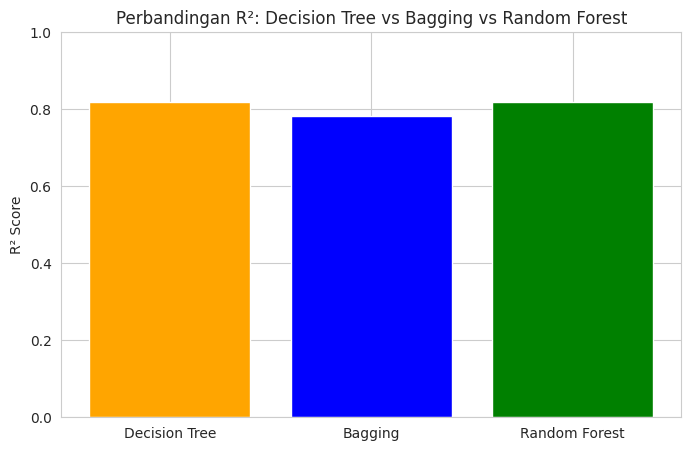

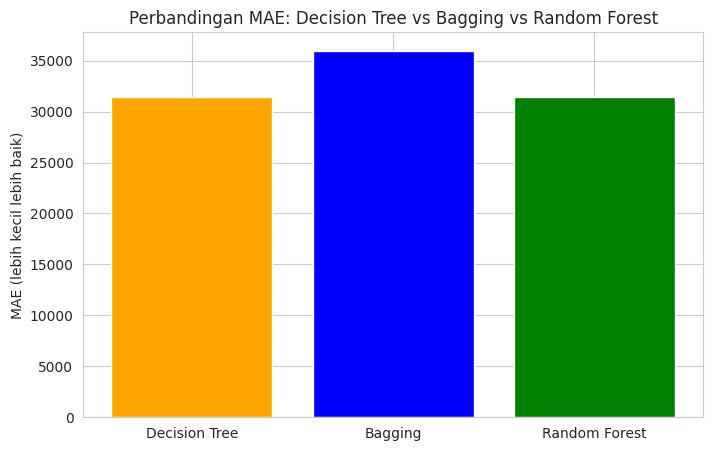

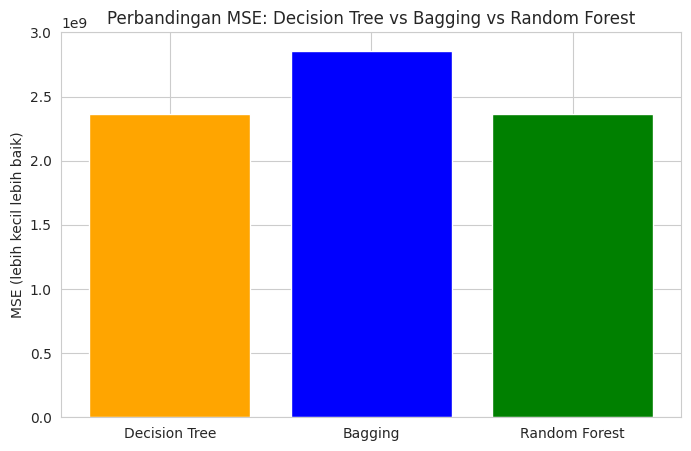

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Hasil dari eksperimen sebelumnya (isi otomatis) ---
# Baseline
baseline_results = {
    "Model": "Decision Tree",
    "MAE": mae,   # ambil dari baseline model
    "MSE": mse,
    "R2": r2
}

# Bagging
best_bagging = results_df.sort_values(by="R2", ascending=False).iloc[0]
bagging_results = {
    "Model": "Bagging",
    "MAE": best_bagging["MAE"],
    "MSE": best_bagging["MSE"],
    "R2": best_bagging["R2"]
}

# Random Forest
best_rf = results_df_rf.sort_values(by="R2", ascending=False).iloc[0]
rf_results = {
    "Model": "Random Forest",
    "MAE": best_rf["MAE"],
    "MSE": best_rf["MSE"],
    "R2": best_rf["R2"]
}

# Gabungkan semua hasil
compare_df = pd.DataFrame([baseline_results, bagging_results, rf_results])
print("=== Perbandingan Model Terbaik ===")
print(compare_df)

# --- Grafik Perbandingan R² ---
plt.figure(figsize=(8,5))
plt.bar(compare_df["Model"], compare_df["R2"], color=["orange","blue","green"])
plt.title("Perbandingan R²: Decision Tree vs Bagging vs Random Forest")
plt.ylabel("R² Score")
plt.ylim(0,1)
plt.show()

# --- Grafik Perbandingan MAE ---
plt.figure(figsize=(8,5))
plt.bar(compare_df["Model"], compare_df["MAE"], color=["orange","blue","green"])
plt.title("Perbandingan MAE: Decision Tree vs Bagging vs Random Forest")
plt.ylabel("MAE (lebih kecil lebih baik)")
plt.show()

# --- Grafik Perbandingan MSE ---
plt.figure(figsize=(8,5))
plt.bar(compare_df["Model"], compare_df["MSE"], color=["orange","blue","green"])
plt.title("Perbandingan MSE: Decision Tree vs Bagging vs Random Forest")
plt.ylabel("MSE (lebih kecil lebih baik)")
plt.show()


# Eksperimen Boosting

### 1. Baseline Model

In [6]:
from sklearn.tree import DecisionTreeRegressor

# Pipeline: Preprocessing + Decision Tree
dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt  = r2_score(y_test, y_pred_dt)

print("=== Baseline: Decision Tree Regressor ===")
print(f"MAE : {mae_dt:.4f}")
print(f"MSE : {mse_dt:.4f}")
print(f"R²  : {r2_dt:.4f}")


=== Baseline: Decision Tree Regressor ===
MAE : 43375.4758
MSE : 4700291228.0921
R²  : 0.6413


### AdaBoost

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Preprocessing (Imputer + OneHot)
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),    # isi NaN numerik
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features) # encode kategori
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Hyperparameter variations
n_estimators_list = [50, 100, 200, 300, 500]
learning_rates = [0.01, 0.1, 0.3, 0.5, 1.0]

results_adaboost = []

for n_est in n_estimators_list:
    for lr in learning_rates:
        # Base estimator: Decision Tree (weak learner)
        base_tree = DecisionTreeRegressor(max_depth=3, random_state=42)

        # AdaBoost Regressor
        model = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("regressor", AdaBoostRegressor(
                estimator=base_tree,
                n_estimators=n_est,
                learning_rate=lr,
                random_state=42
            ))
        ])

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Evaluate
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2  = r2_score(y_test, y_pred)

        results_adaboost.append({
            "n_estimators": n_est,
            "learning_rate": lr,
            "MAE": mae,
            "MSE": mse,
            "R2": r2
        })

# 6. Simpan hasil ke DataFrame
results_df_adaboost = pd.DataFrame(results_adaboost)
print("=== Hasil Eksperimen AdaBoost ===")
print(results_df_adaboost)

# Urutkan berdasarkan R² terbaik
print("\n=== Top 5 Model AdaBoost Berdasarkan R² ===")
print(results_df_adaboost.sort_values(by="R2", ascending=False).head())


=== Hasil Eksperimen AdaBoost ===
    n_estimators  learning_rate           MAE           MSE        R2
0             50           0.01  55383.319324  5.801089e+09  0.557307
1             50           0.10  59149.967689  5.770473e+09  0.559643
2             50           0.30  65945.530392  6.455942e+09  0.507334
3             50           0.50  72008.168251  7.373580e+09  0.437307
4             50           1.00  79148.116351  8.224954e+09  0.372337
5            100           0.01  55213.907878  5.708076e+09  0.564405
6            100           0.10  63478.924911  6.185487e+09  0.527973
7            100           0.30  67013.464507  6.589137e+09  0.497169
8            100           0.50  74102.735589  7.686964e+09  0.413392
9            100           1.00  79148.116351  8.224954e+09  0.372337
10           200           0.01  55436.177122  5.604074e+09  0.572342
11           200           0.10  68632.195833  6.817082e+09  0.479774
12           200           0.30  67013.464507  6.589137e

### Gradient Boosting

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Preprocessing (Imputer + OneHot)
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Hyperparameter variations
n_estimators_list = [50, 100, 200, 300, 500]
learning_rates = [0.01, 0.1, 0.3, 0.5, 1.0]
max_depth_list = [3, 5, 7]

results_gb = []

for n_est in n_estimators_list:
    for lr in learning_rates:
        for depth in max_depth_list:
            # Gradient Boosting Regressor
            model = Pipeline(steps=[
                ("preprocessor", preprocessor),
                ("regressor", GradientBoostingRegressor(
                    n_estimators=n_est,
                    learning_rate=lr,
                    max_depth=depth,
                    random_state=42
                ))
            ])

            # Train
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)

            # Evaluate
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            r2  = r2_score(y_test, y_pred)

            results_gb.append({
                "n_estimators": n_est,
                "learning_rate": lr,
                "max_depth": depth,
                "MAE": mae,
                "MSE": mse,
                "R2": r2
            })

# 6. Simpan hasil ke DataFrame
results_df_gb = pd.DataFrame(results_gb)
print("=== Hasil Eksperimen Gradient Boosting ===")
print(results_df_gb)

# Urutkan berdasarkan R² terbaik
print("\n=== Top 5 Model Gradient Boosting Berdasarkan R² ===")
print(results_df_gb.sort_values(by="R2", ascending=False).head())


=== Hasil Eksperimen Gradient Boosting ===
    n_estimators  learning_rate  max_depth           MAE           MSE  \
0             50           0.01          3  71086.725332  8.351569e+09   
1             50           0.01          5  68606.560681  7.805279e+09   
2             50           0.01          7  66135.610664  7.205102e+09   
3             50           0.10          3  42966.776111  3.813121e+09   
4             50           0.10          5  36243.067492  2.875004e+09   
..           ...            ...        ...           ...           ...   
70           500           0.50          5  35928.471405  2.830460e+09   
71           500           0.50          7  35483.677307  2.758519e+09   
72           500           1.00          3  38291.820054  3.312097e+09   
73           500           1.00          5  44899.658826  4.397250e+09   
74           500           1.00          7  46907.033887  4.774329e+09   

          R2  
0   0.362675  
1   0.404363  
2   0.450164  
3   0.70

### XGBoost

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Preprocessing (Imputer + OneHot)
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Hyperparameter variations
n_estimators_list = [50, 100, 200, 300, 500]
learning_rates = [0.01, 0.1, 0.3, 0.5, 1.0]
subsamples = [0.5, 0.8, 1.0]

results_xgb = []

for n_est in n_estimators_list:
    for lr in learning_rates:
        for subs in subsamples:
            # XGBoost Regressor (GPU)
            model = Pipeline(steps=[
                ("preprocessor", preprocessor),
                ("regressor", XGBRegressor(
                    n_estimators=n_est,
                    learning_rate=lr,
                    subsample=subs,
                    max_depth=6,
                    objective="reg:squarederror",
                    random_state=42,
                    n_jobs=-1,
                    tree_method="gpu_hist",     # ⚡ Training di GPU
                    predictor="gpu_predictor",  # ⚡ Prediksi di GPU
                    verbosity=0
                ))
            ])

            # Train
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)

            # Evaluate
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            r2  = r2_score(y_test, y_pred)

            results_xgb.append({
                "n_estimators": n_est,
                "learning_rate": lr,
                "subsample": subs,
                "MAE": mae,
                "MSE": mse,
                "R2": r2
            })

# 6. Simpan hasil ke DataFrame
results_df_xgb = pd.DataFrame(results_xgb)
print("=== Hasil Eksperimen XGBoost (GPU) ===")
print(results_df_xgb)

# Urutkan berdasarkan R² terbaik
print("\n=== Top 5 Model XGBoost (GPU) Berdasarkan R² ===")
print(results_df_xgb.sort_values(by="R2", ascending=False).head())


=== Hasil Eksperimen XGBoost (GPU) ===
    n_estimators  learning_rate  subsample           MAE           MSE  \
0             50           0.01        0.5  67316.370045  7.516650e+09   
1             50           0.01        0.8  67261.099659  7.495731e+09   
2             50           0.01        1.0  67314.385163  7.505611e+09   
3             50           0.10        0.5  34825.022274  2.700129e+09   
4             50           0.10        0.8  34340.144016  2.607249e+09   
..           ...            ...        ...           ...           ...   
70           500           0.50        0.8  35646.984822  2.777191e+09   
71           500           0.50        1.0  34125.915109  2.578111e+09   
72           500           1.00        0.5  71241.774953  9.408033e+09   
73           500           1.00        0.8  45889.516918  4.165263e+09   
74           500           1.00        1.0  42126.266938  3.677027e+09   

          R2  
0   0.426389  
1   0.427985  
2   0.427231  
3   0.793948

### Output

=== Perbandingan Model Boosting Terbaik ===
               Model           MAE           MSE        R2
0           AdaBoost  56252.699810  5.562651e+09  0.575503
1  Gradient Boosting  30156.593842  2.109020e+09  0.839056
2      XGBoost (GPU)  29744.267697  2.063608e+09  0.842522


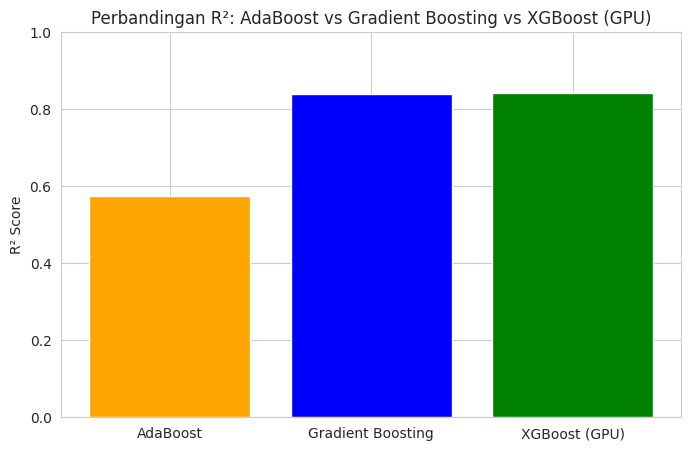

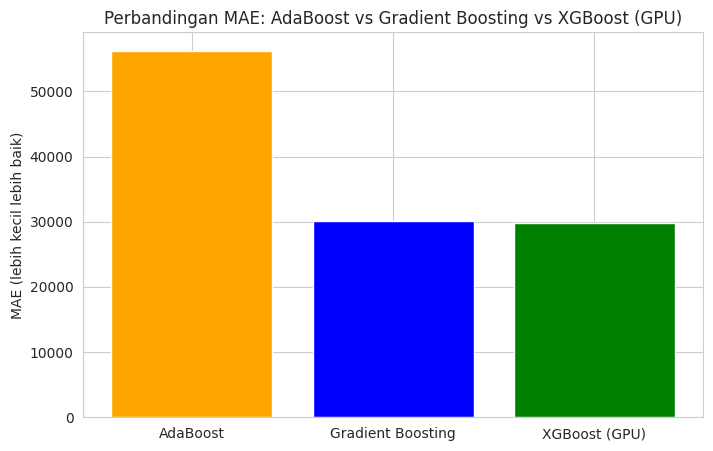

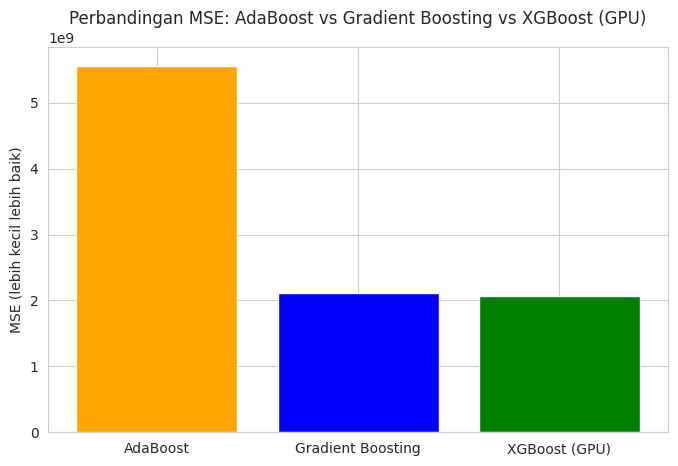

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Ambil model terbaik dari tiap boosting
best_adaboost = results_df_adaboost.loc[results_df_adaboost["R2"].idxmax()]
best_gb = results_df_gb.loc[results_df_gb["R2"].idxmax()]
best_xgb = results_df_xgb.loc[results_df_xgb["R2"].idxmax()]

# Gabungkan hasil terbaik
compare_boosting = pd.DataFrame([
    {"Model": "AdaBoost", "MAE": best_adaboost["MAE"], "MSE": best_adaboost["MSE"], "R2": best_adaboost["R2"]},
    {"Model": "Gradient Boosting", "MAE": best_gb["MAE"], "MSE": best_gb["MSE"], "R2": best_gb["R2"]},
    {"Model": "XGBoost (GPU)", "MAE": best_xgb["MAE"], "MSE": best_xgb["MSE"], "R2": best_xgb["R2"]}
])

print("=== Perbandingan Model Boosting Terbaik ===")
print(compare_boosting)

# --- Grafik Perbandingan R² ---
plt.figure(figsize=(8,5))
plt.bar(compare_boosting["Model"], compare_boosting["R2"], color=["orange","blue","green"])
plt.title("Perbandingan R²: AdaBoost vs Gradient Boosting vs XGBoost (GPU)")
plt.ylabel("R² Score")
plt.ylim(0,1)
plt.show()

# --- Grafik Perbandingan MAE ---
plt.figure(figsize=(8,5))
plt.bar(compare_boosting["Model"], compare_boosting["MAE"], color=["orange","blue","green"])
plt.title("Perbandingan MAE: AdaBoost vs Gradient Boosting vs XGBoost (GPU)")
plt.ylabel("MAE (lebih kecil lebih baik)")
plt.show()

# --- Grafik Perbandingan MSE ---
plt.figure(figsize=(8,5))
plt.bar(compare_boosting["Model"], compare_boosting["MSE"], color=["orange","blue","green"])
plt.title("Perbandingan MSE: AdaBoost vs Gradient Boosting vs XGBoost (GPU)")
plt.ylabel("MSE (lebih kecil lebih baik)")
plt.show()


# Eskperimen Stacking

### 1. Baseline Model

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Preprocessing (Imputer + OneHot)
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Base Models
base_dt = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(max_depth=5, random_state=42))
])

base_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1))
])

base_gb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))
])


### 2. Meta Model

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Preprocessing (Imputer + OneHot)
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Base Models
base_dt = ("dt", DecisionTreeRegressor(max_depth=5, random_state=42))
base_rf = ("rf", RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1))
base_gb = ("gb", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))

# 6. Meta Model (Linear Regression)
meta_model = LinearRegression()

# 7. Stacking Regressor
stacking = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", StackingRegressor(
        estimators=[base_dt, base_rf, base_gb],
        final_estimator=meta_model,
        n_jobs=-1
    ))
])

# 8. Train Stacking Model
stacking.fit(X_train, y_train)

# 9. Predict & Evaluate
y_pred = stacking.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("=== Stacking Regressor (Meta: Linear Regression) ===")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")


=== Stacking Regressor (Meta: Linear Regression) ===
MAE : 31756.3945
MSE : 2276260985.0465
R²  : 0.8263


### 3. Stacking Implementations

=== Hasil Eksperimen Stacking ===
               Model           MAE           MSE        R2
0  Stacking - Comb 1  48056.015262  4.497969e+09  0.656751
1  Stacking - Comb 2  31955.088000  2.302764e+09  0.824271
2  Stacking - Comb 3  49291.464432  4.677628e+09  0.643041


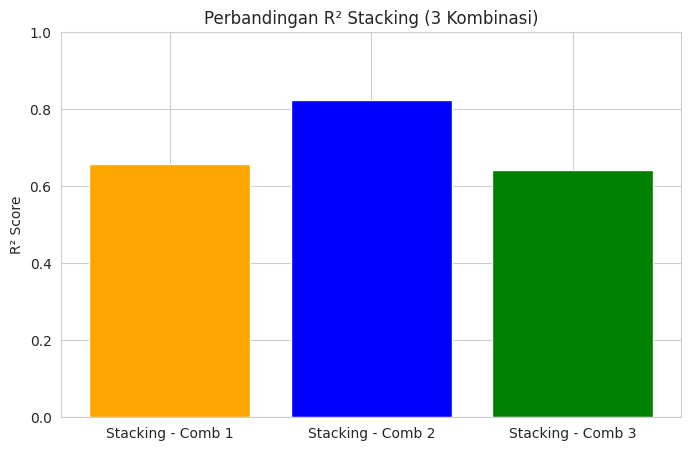

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Preprocessing (Imputer + OneHot)
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Kombinasi Base Models ---

# Kombinasi 1: Decision Tree, AdaBoost, (Logistic Regression diganti LinearRegression, karena regresi)
comb1_estimators = [
    ("dt", DecisionTreeRegressor(max_depth=5, random_state=42)),
    ("lr", LinearRegression()),
    ("ada", AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=42))
]

# Kombinasi 2: Random Forest, Gradient Boosting, SVM
comb2_estimators = [
    ("rf", RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)),
    ("gb", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)),
    ("svm", SVR(kernel="rbf", C=100, epsilon=0.1))
]

# Kombinasi 3: AdaBoost, SVM, Decision Tree
comb3_estimators = [
    ("ada", AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=42)),
    ("svm", SVR(kernel="rbf", C=100, epsilon=0.1)),
    ("dt", DecisionTreeRegressor(max_depth=5, random_state=42))
]

# Meta Model
meta_model = LinearRegression()

# --- Training & Evaluation Function ---
def evaluate_stacking(estimators, name):
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", StackingRegressor(
            estimators=estimators,
            final_estimator=meta_model,
            n_jobs=-1
        ))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    return {"Model": name, "MAE": mae, "MSE": mse, "R2": r2}

# --- Run Experiments ---
results_stacking = []
results_stacking.append(evaluate_stacking(comb1_estimators, "Stacking - Comb 1"))
results_stacking.append(evaluate_stacking(comb2_estimators, "Stacking - Comb 2"))
results_stacking.append(evaluate_stacking(comb3_estimators, "Stacking - Comb 3"))

# --- Save to DataFrame ---
results_df_stacking = pd.DataFrame(results_stacking)
print("=== Hasil Eksperimen Stacking ===")
print(results_df_stacking)

# --- Visualisasi Perbandingan ---
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df_stacking["Model"], results_df_stacking["R2"], color=["orange","blue","green"])
plt.title("Perbandingan R² Stacking (3 Kombinasi)")
plt.ylabel("R² Score")
plt.ylim(0,1)
plt.show()


### 4. K-Fold

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Preprocessing
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# 4. Define base model combinations
comb1_estimators = [
    ("dt", DecisionTreeRegressor(max_depth=5, random_state=42)),
    ("lr", LinearRegression()),
    ("ada", AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=42))
]

comb2_estimators = [
    ("rf", RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)),
    ("gb", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)),
    ("svm", SVR(kernel="rbf", C=100, epsilon=0.1))
]

comb3_estimators = [
    ("ada", AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=42)),
    ("svm", SVR(kernel="rbf", C=100, epsilon=0.1)),
    ("dt", DecisionTreeRegressor(max_depth=5, random_state=42))
]

meta_model = LinearRegression()

# 5. Function to run cross-validation
def evaluate_stacking_cv(estimators, name):
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", StackingRegressor(
            estimators=estimators,
            final_estimator=meta_model,
            n_jobs=-1
        ))
    ])
    
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_validate(
        model, X, y, cv=cv,
        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error"],
        n_jobs=-1,
        return_train_score=False
    )
    
    return {
        "Model": name,
        "R2 Mean": scores["test_r2"].mean(),
        "R2 Std": scores["test_r2"].std(),
        "MAE Mean": -scores["test_neg_mean_absolute_error"].mean(),
        "MAE Std": scores["test_neg_mean_absolute_error"].std(),
        "MSE Mean": -scores["test_neg_mean_squared_error"].mean(),
        "MSE Std": scores["test_neg_mean_squared_error"].std()
    }

# 6. Run for all combinations
results_cv = []
results_cv.append(evaluate_stacking_cv(comb1_estimators, "Stacking - Comb 1"))
results_cv.append(evaluate_stacking_cv(comb2_estimators, "Stacking - Comb 2"))
results_cv.append(evaluate_stacking_cv(comb3_estimators, "Stacking - Comb 3"))

results_df_cv = pd.DataFrame(results_cv)
print("=== Hasil 10-Fold Cross-Validation Stacking ===")
print(results_df_cv)


=== Hasil 10-Fold Cross-Validation Stacking ===
               Model   R2 Mean    R2 Std      MAE Mean      MAE Std  \
0  Stacking - Comb 1  0.659122  0.019747  48462.364058  1329.570286   
1  Stacking - Comb 2  0.819111  0.012696  32232.293451   983.034743   
2  Stacking - Comb 3  0.641822  0.018772  50208.916170  1510.057649   

       MSE Mean       MSE Std  
0  4.538786e+09  3.098101e+08  
1  2.409390e+09  2.012317e+08  
2  4.768050e+09  2.843737e+08  


### Output

=== Perbandingan Base Models vs Stacking ===
               Model           MAE           MSE        R2
0      Decision Tree  50295.915499  5.105514e+09  0.610388
1      Random Forest  39827.115327  3.380625e+09  0.742018
2  Gradient Boosting  31984.843929  2.311149e+09  0.823631
3           AdaBoost  79148.116351  8.224954e+09  0.372337
4                SVM  84791.644265  1.297397e+10  0.009930
5  Linear Regression  50670.489236  4.908291e+09  0.625438
6  Stacking - Comb 1  48056.015262  4.497969e+09  0.656751
7  Stacking - Comb 2  31955.088000  2.302764e+09  0.824271
8  Stacking - Comb 3  49291.464432  4.677628e+09  0.643041


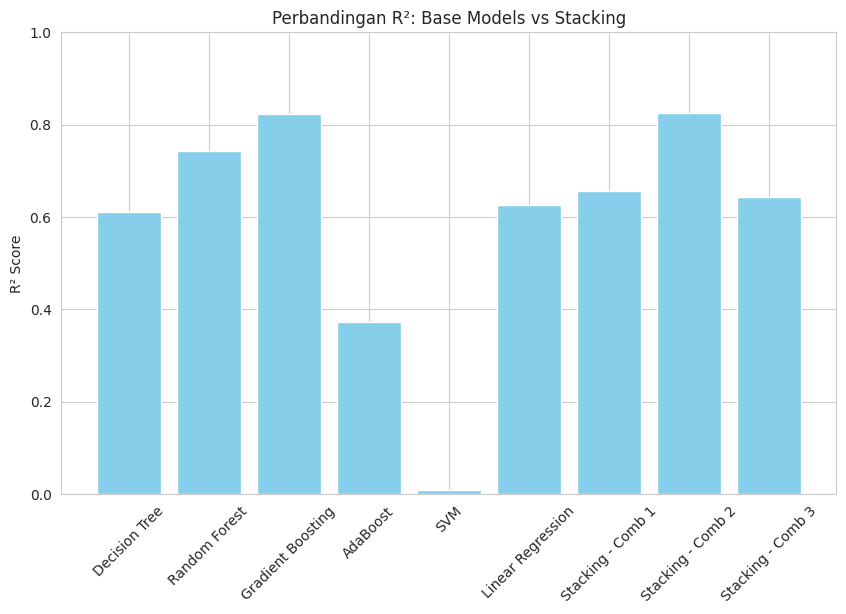

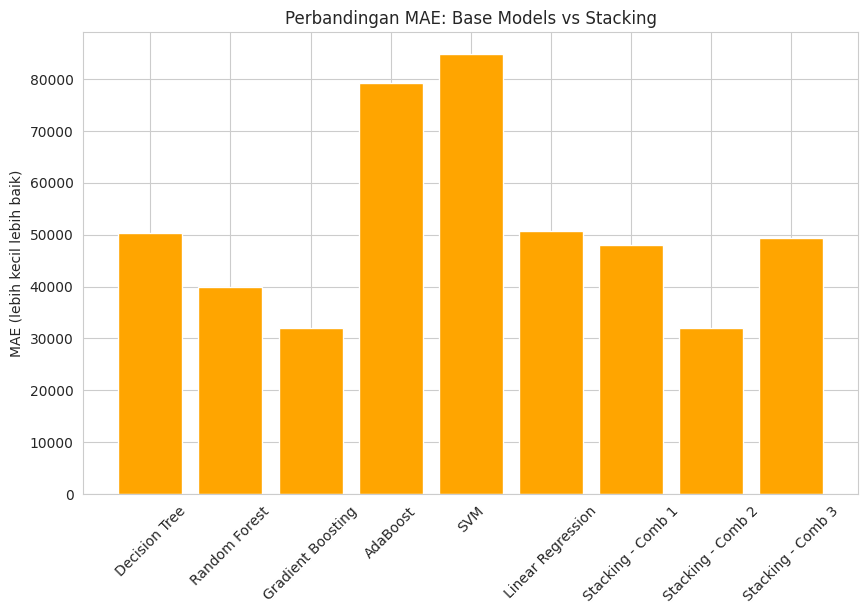

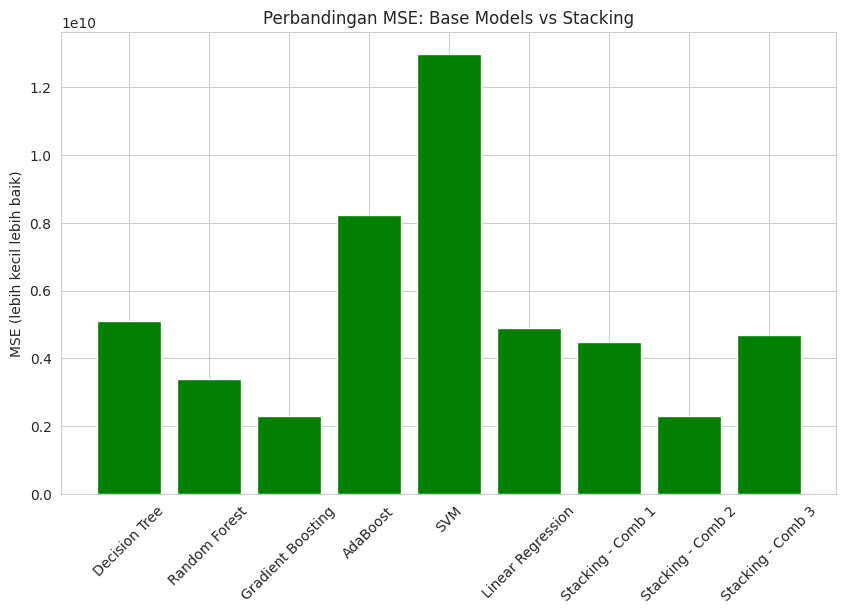

In [15]:
import matplotlib.pyplot as plt

# === 1. Evaluasi base models individual ===
base_models_results = []

# Decision Tree
dt = Pipeline(steps=[("preprocessor", preprocessor),
                     ("regressor", DecisionTreeRegressor(max_depth=5, random_state=42))])
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
base_models_results.append({"Model": "Decision Tree",
                            "MAE": mean_absolute_error(y_test, y_pred),
                            "MSE": mean_squared_error(y_test, y_pred),
                            "R2": r2_score(y_test, y_pred)})

# Random Forest
rf = Pipeline(steps=[("preprocessor", preprocessor),
                     ("regressor", RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1))])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
base_models_results.append({"Model": "Random Forest",
                            "MAE": mean_absolute_error(y_test, y_pred),
                            "MSE": mean_squared_error(y_test, y_pred),
                            "R2": r2_score(y_test, y_pred)})

# Gradient Boosting
gb = Pipeline(steps=[("preprocessor", preprocessor),
                     ("regressor", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))])
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
base_models_results.append({"Model": "Gradient Boosting",
                            "MAE": mean_absolute_error(y_test, y_pred),
                            "MSE": mean_squared_error(y_test, y_pred),
                            "R2": r2_score(y_test, y_pred)})

# AdaBoost
ada = Pipeline(steps=[("preprocessor", preprocessor),
                      ("regressor", AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=42))])
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
base_models_results.append({"Model": "AdaBoost",
                            "MAE": mean_absolute_error(y_test, y_pred),
                            "MSE": mean_squared_error(y_test, y_pred),
                            "R2": r2_score(y_test, y_pred)})

# SVM
svm = Pipeline(steps=[("preprocessor", preprocessor),
                      ("regressor", SVR(kernel="rbf", C=100, epsilon=0.1))])
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
base_models_results.append({"Model": "SVM",
                            "MAE": mean_absolute_error(y_test, y_pred),
                            "MSE": mean_squared_error(y_test, y_pred),
                            "R2": r2_score(y_test, y_pred)})

# Linear Regression
lr = Pipeline(steps=[("preprocessor", preprocessor),
                     ("regressor", LinearRegression())])
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
base_models_results.append({"Model": "Linear Regression",
                            "MAE": mean_absolute_error(y_test, y_pred),
                            "MSE": mean_squared_error(y_test, y_pred),
                            "R2": r2_score(y_test, y_pred)})

# Convert ke DataFrame
results_base_df = pd.DataFrame(base_models_results)

# === 2. Gabungkan dengan hasil stacking ===
results_final = pd.concat([results_base_df, results_df_stacking], ignore_index=True)

print("=== Perbandingan Base Models vs Stacking ===")
print(results_final)

# === 3. Grafik Perbandingan R² ===
plt.figure(figsize=(10,6))
plt.bar(results_final["Model"], results_final["R2"], color="skyblue")
plt.title("Perbandingan R²: Base Models vs Stacking")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

# === 4. Grafik Perbandingan MAE ===
plt.figure(figsize=(10,6))
plt.bar(results_final["Model"], results_final["MAE"], color="orange")
plt.title("Perbandingan MAE: Base Models vs Stacking")
plt.ylabel("MAE (lebih kecil lebih baik)")
plt.xticks(rotation=45)
plt.show()

# === 5. Grafik Perbandingan MSE ===
plt.figure(figsize=(10,6))
plt.bar(results_final["Model"], results_final["MSE"], color="green")
plt.title("Perbandingan MSE: Base Models vs Stacking")
plt.ylabel("MSE (lebih kecil lebih baik)")
plt.xticks(rotation=45)
plt.show()


# Super Learner

### 1. Base Models (5 Model)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Preprocessing (Imputer + OneHot)
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Base Models
base_dt = ("dt", DecisionTreeRegressor(max_depth=5, random_state=42))
base_rf = ("rf", RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1))
base_gb = ("gb", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))
base_xgb = ("xgb", XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    subsample=0.8,
    max_depth=6,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    tree_method="gpu_hist",     # ⚡ Training di GPU
    predictor="gpu_predictor",  # ⚡ Prediksi di GPU
    verbosity=0
))
base_lr = ("lr", LinearRegression())


### 2. Meta Learner

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# --- Base Models dari step sebelumnya ---
base_estimators = [base_dt, base_rf, base_gb, base_xgb, base_lr]

# Meta Learner
meta_model = LinearRegression()

# Super Learner (Stacking)
super_learner = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", StackingRegressor(
        estimators=base_estimators,
        final_estimator=meta_model,
        n_jobs=-1
    ))
])

# Train
super_learner.fit(X_train, y_train)

# Predict
y_pred = super_learner.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("=== Super Learner (Meta: Linear Regression) ===")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")


/home/riset/.local/lib/python3.10/site-packages/joblib/externals/cloudpickle/cloudpickle_fast.py:632: UserWarning: [21:54:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  return Pickler.dump(self, obj)


=== Super Learner (Meta: Linear Regression) ===
MAE : 30719.9341
MSE : 2146384088.2888
R²  : 0.8362


### 3. Implementasi

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Preprocessing (Imputer + OneHot)
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Base Models
base_models = [
    ("dt", DecisionTreeRegressor(max_depth=5, random_state=42)),
    ("rf", RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)),
    ("gb", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)),
    ("xgb", XGBRegressor(
        n_estimators=200, learning_rate=0.1, subsample=0.8, max_depth=6,
        objective="reg:squarederror", random_state=42, n_jobs=-1,
        tree_method="gpu_hist", predictor="gpu_predictor", verbosity=0
    )),
    ("lr", LinearRegression())
]

# 6. Generate Out-Of-Fold (OOF) Predictions for Training Meta-Learner
kf = KFold(n_splits=10, shuffle=True, random_state=42)

oof_preds = np.zeros((len(X_train), len(base_models)))
test_preds = np.zeros((len(X_test), len(base_models)))

for i, (name, model) in enumerate(base_models):
    fold_test_preds = []
    for train_idx, val_idx in kf.split(X_train, y_train):
        # Split fold
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Pipeline for preprocessing + model
        pipe = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("regressor", model)
        ])

        # Train on fold
        pipe.fit(X_tr, y_tr)

        # Predict on validation fold → OOF preds
        oof_preds[val_idx, i] = pipe.predict(X_val)

        # Predict on test set
        fold_test_preds.append(pipe.predict(X_test))

    # Average predictions for test set across folds
    test_preds[:, i] = np.mean(fold_test_preds, axis=0)

# 7. Meta-Learner (Linear Regression)
meta_learner = LinearRegression()
meta_learner.fit(oof_preds, y_train)

# 8. Final Prediction on Test Set
final_preds = meta_learner.predict(test_preds)

# 9. Evaluation
mae = mean_absolute_error(y_test, final_preds)
mse = mean_squared_error(y_test, final_preds)
r2  = r2_score(y_test, final_preds)

print("=== Super Learner (10-Fold CV, Meta: Linear Regression) ===")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")


=== Super Learner (10-Fold CV, Meta: Linear Regression) ===
MAE : 30431.1394
MSE : 2122234525.0696
R²  : 0.8380


### 3a. Meta Learner = XGBoost Regressor

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 3. Preprocessing
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Base Models
base_models = [
    ("dt", DecisionTreeRegressor(max_depth=5, random_state=42)),
    ("rf", RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)),
    ("gb", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)),
    ("xgb", XGBRegressor(
        n_estimators=200, learning_rate=0.1, subsample=0.8, max_depth=6,
        objective="reg:squarederror", random_state=42, n_jobs=-1,
        tree_method="gpu_hist", predictor="gpu_predictor", verbosity=0
    )),
    ("lr", LinearRegression())
]

# 6. Generate Out-Of-Fold (OOF) Predictions
kf = KFold(n_splits=10, shuffle=True, random_state=42)

oof_preds = np.zeros((len(X_train), len(base_models)))
test_preds = np.zeros((len(X_test), len(base_models)))

for i, (name, model) in enumerate(base_models):
    fold_test_preds = []
    for train_idx, val_idx in kf.split(X_train, y_train):
        # Split fold
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Pipeline for preprocessing + model
        pipe = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("regressor", model)
        ])

        # Train on fold
        pipe.fit(X_tr, y_tr)

        # Predict on validation fold → OOF preds
        oof_preds[val_idx, i] = pipe.predict(X_val)

        # Predict on test set
        fold_test_preds.append(pipe.predict(X_test))

    # Average predictions for test set across folds
    test_preds[:, i] = np.mean(fold_test_preds, axis=0)

# 7. Meta-Learner = XGBoost
meta_learner = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    tree_method="gpu_hist",     # ⚡ GPU Training
    predictor="gpu_predictor",  # ⚡ GPU Inference
    verbosity=0
)

meta_learner.fit(oof_preds, y_train)

# 8. Final Prediction on Test Set
final_preds = meta_learner.predict(test_preds)

# 9. Evaluation
mae = mean_absolute_error(y_test, final_preds)
mse = mean_squared_error(y_test, final_preds)
r2  = r2_score(y_test, final_preds)

print("=== Super Learner (10-Fold CV, Meta: XGBoost) ===")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")


=== Super Learner (10-Fold CV, Meta: XGBoost) ===
MAE : 30263.2256
MSE : 2136432623.7943
R²  : 0.8370


### 3. Feature Engineering

In [20]:
#Feature Engineering – bikin fitur baru:
#rooms_per_household = total_rooms / households
#bedrooms_per_room = total_bedrooms / total_rooms
#population_per_household = population / households
#Hyperparameter Tuning – pakai RandomizedSearchCV untuk eksplor parameter Random Forest, Gradient Boosting, dan XGBoost.

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform

# 1. Load dataset
df = pd.read_csv("housing.csv")

# 2. Feature Engineering
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# 3. Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 4. Preprocessing
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Hyperparameter Search Spaces ---
rf_param_dist = {
    "regressor__n_estimators": randint(100, 500),
    "regressor__max_depth": randint(3, 20),
    "regressor__max_features": ["sqrt", "log2", None]
}

gb_param_dist = {
    "regressor__n_estimators": randint(100, 500),
    "regressor__learning_rate": uniform(0.01, 0.3),
    "regressor__max_depth": randint(3, 10)
}

xgb_param_dist = {
    "regressor__n_estimators": randint(100, 500),
    "regressor__learning_rate": uniform(0.01, 0.3),
    "regressor__max_depth": randint(3, 10),
    "regressor__subsample": uniform(0.5, 0.5),
    "regressor__colsample_bytree": uniform(0.5, 0.5)
}

# --- Function for tuning and evaluating ---
def tune_and_evaluate(model, param_dist, name, n_iter=20):
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    search = RandomizedSearchCV(
        pipe, param_distributions=param_dist,
        n_iter=n_iter, cv=5, scoring="r2",
        n_jobs=-1, random_state=42, verbose=1
    )
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n=== {name} Best Model ===")
    print("Best Params:", search.best_params_)
    print(f"MAE : {mae:.4f}")
    print(f"MSE : {mse:.4f}")
    print(f"R²  : {r2:.4f}")
    return {"Model": name, "MAE": mae, "MSE": mse, "R2": r2, "BestParams": search.best_params_}

# 6. Run tuning
results = []
results.append(tune_and_evaluate(RandomForestRegressor(random_state=42), rf_param_dist, "Random Forest"))
results.append(tune_and_evaluate(GradientBoostingRegressor(random_state=42), gb_param_dist, "Gradient Boosting"))
results.append(tune_and_evaluate(XGBRegressor(
    objective="reg:squarederror", random_state=42, n_jobs=-1,
    tree_method="gpu_hist", predictor="gpu_predictor", verbosity=0
), xgb_param_dist, "XGBoost (GPU)"))

# 7. Summary
results_df = pd.DataFrame(results)
print("\n=== Summary of Tuned Models ===")
print(results_df)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/riset/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



=== Random Forest Best Model ===
Best Params: {'regressor__max_depth': 19, 'regressor__max_features': 'log2', 'regressor__n_estimators': 459}
MAE : 32286.2941
MSE : 2377162636.0271
R²  : 0.8186
Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Gradient Boosting Best Model ===
Best Params: {'regressor__learning_rate': 0.12473859738014881, 'regressor__max_depth': 6, 'regressor__n_estimators': 419}
MAE : 29018.6629
MSE : 2034538270.7847
R²  : 0.8447
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/riset/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



=== XGBoost (GPU) Best Model ===
Best Params: {'regressor__colsample_bytree': 0.6943386448447411, 'regressor__learning_rate': 0.09140470953216877, 'regressor__max_depth': 7, 'regressor__n_estimators': 379, 'regressor__subsample': 0.6783766633467947}
MAE : 28912.9637
MSE : 1990885025.6818
R²  : 0.8481

=== Summary of Tuned Models ===
               Model           MAE           MSE        R2  \
0      Random Forest  32286.294068  2.377163e+09  0.818594   
1  Gradient Boosting  29018.662893  2.034538e+09  0.844740   
2      XGBoost (GPU)  28912.963737  1.990885e+09  0.848071   

                                          BestParams  
0  {'regressor__max_depth': 19, 'regressor__max_f...  
1  {'regressor__learning_rate': 0.124738597380148...  
2  {'regressor__colsample_bytree': 0.694338644844...  


Bagging (DT) → MAE: 45655.60, MSE: 4222150631.99, R²: 0.6778
Random Forest → MAE: 35432.85, MSE: 2847851055.75, R²: 0.7827
AdaBoost → MAE: 63193.19, MSE: 5784774554.84, R²: 0.5586
Gradient Boosting (sklearn) → MAE: 30540.40, MSE: 2151972186.74, R²: 0.8358
XGBoost (XGBRegressor) → MAE: 29859.04, MSE: 2073660698.31, R²: 0.8418
SuperLearner Comb1 (DT+RF+GB), Meta=RandomForest → MAE: 33189.09, MSE: 2585770040.52, R²: 0.8027
SuperLearner Comb1 (DT+RF+GB), Meta=GradientBoosting → MAE: 31272.53, MSE: 2371934660.46, R²: 0.8190
SuperLearner Comb2 (RF+XGB+LR), Meta=RandomForest → MAE: 31295.26, MSE: 2323489734.56, R²: 0.8227
SuperLearner Comb2 (RF+XGB+LR), Meta=GradientBoosting → MAE: 29208.84, MSE: 2098583406.10, R²: 0.8399
SuperLearner Comb3 (DT+GB+XGB+LR), Meta=RandomForest → MAE: 31212.05, MSE: 2277168650.20, R²: 0.8262
SuperLearner Comb3 (DT+GB+XGB+LR), Meta=GradientBoosting → MAE: 29723.24, MSE: 2152419417.34, R²: 0.8357
SuperLearner Comb4 (All Models), Meta=RandomForest → MAE: 30432.51, M

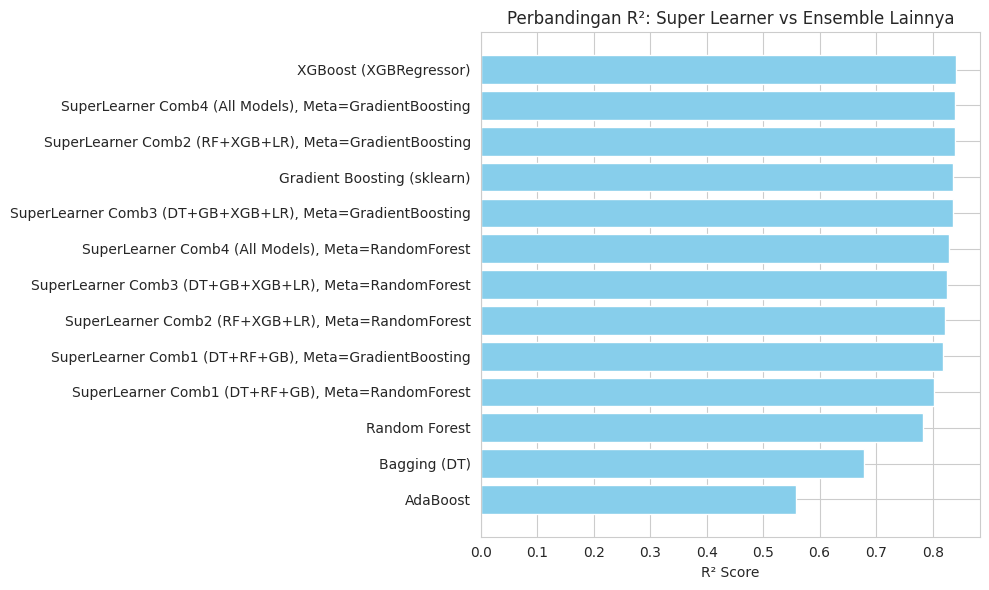

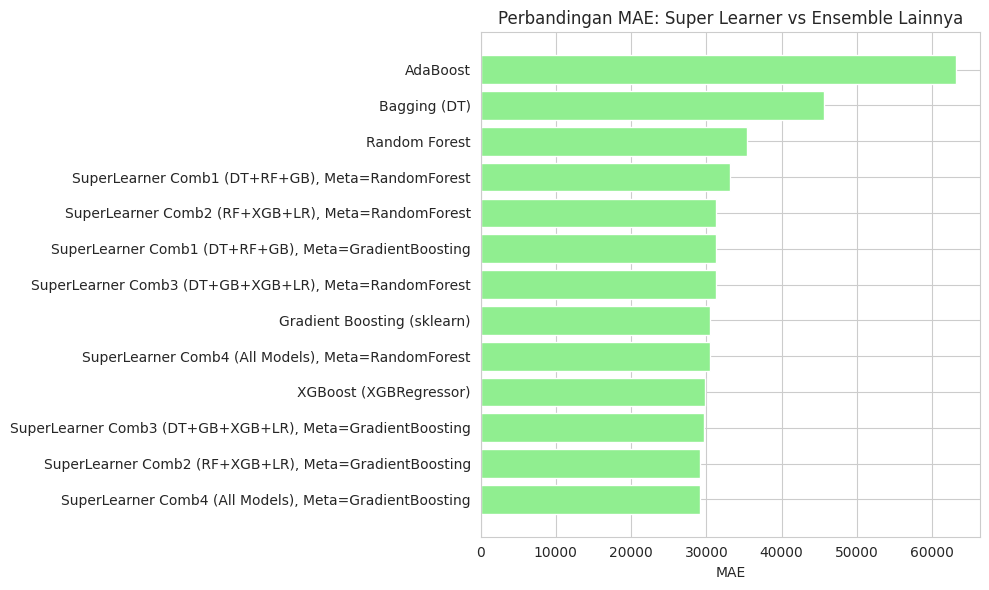

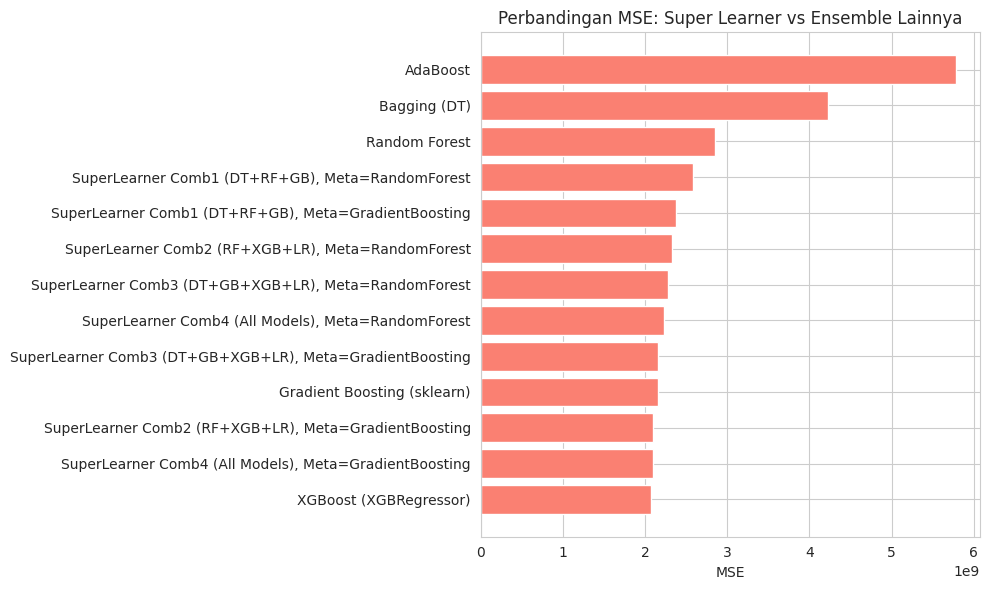


Hasil disimpan ke experiment_results_superlearner_meta_rf_gb.csv


In [25]:
# eksperimen_superlearner_meta_rf_gb.py
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    BaggingRegressor, AdaBoostRegressor, StackingRegressor
)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load & feature engineering
# ------------------------------
df = pd.read_csv("housing.csv")

# create derived features (safe division with fillna to avoid inf)
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# replace infinite or NaN from divisions (if any) with median later via imputer,
# but it's fine to leave NaN here because pipeline will impute numeric columns.
# ------------------------------
# 2. Features & target
# ------------------------------
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# ------------------------------
# 3. Preprocessing pipeline
# ------------------------------
cat_features = ["ocean_proximity"]
num_features = X.columns.drop(cat_features)

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# ------------------------------
# 4. Train-test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 5. Utility evaluation function
# ------------------------------
def evaluate_model(name, model):
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} → MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.4f}")
    return {"Model": name, "MAE": mae, "MSE": mse, "R2": r2}

results = []

# ------------------------------
# 6. Baseline ensemble comparisons
# ------------------------------
# Bagging (DT)
results.append(evaluate_model("Bagging (DT)", BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=100, random_state=42, n_jobs=-1)))

# Random Forest
results.append(evaluate_model("Random Forest", RandomForestRegressor(
    n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)))

# AdaBoost (use estimator=)
results.append(evaluate_model("AdaBoost", AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=200, learning_rate=0.1, random_state=42)))

# Gradient Boosting (sklearn)
results.append(evaluate_model("Gradient Boosting (sklearn)", GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)))

# XGBoost (GPU if available; uses new API tree_method="hist", device="cuda")
xgb_params = dict(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    verbosity=0
)
# set GPU device if possible (XGBoost >=2.0 expects device="cuda")
xgb_gpu = XGBRegressor(**xgb_params, tree_method="hist", device="cuda")
results.append(evaluate_model("XGBoost (XGBRegressor)", xgb_gpu))

# ------------------------------
# 7. Super Learner combinations (base models)
# ------------------------------
combinations = {
    "Comb1 (DT+RF+GB)": [
        ("dt", DecisionTreeRegressor(max_depth=5, random_state=42)),
        ("rf", RandomForestRegressor(n_estimators=100, random_state=42)),
        ("gb", GradientBoostingRegressor(n_estimators=200, random_state=42))
    ],
    "Comb2 (RF+XGB+LR)": [
        ("rf", RandomForestRegressor(n_estimators=100, random_state=42)),
        ("xgb", XGBRegressor(n_estimators=200, random_state=42, verbosity=0, tree_method="hist", device="cuda")),
        ("lr", LinearRegression())
    ],
    "Comb3 (DT+GB+XGB+LR)": [
        ("dt", DecisionTreeRegressor(max_depth=5, random_state=42)),
        ("gb", GradientBoostingRegressor(n_estimators=200, random_state=42)),
        ("xgb", XGBRegressor(n_estimators=200, random_state=42, verbosity=0, tree_method="hist", device="cuda")),
        ("lr", LinearRegression())
    ],
    "Comb4 (All Models)": [
        ("dt", DecisionTreeRegressor(max_depth=5, random_state=42)),
        ("rf", RandomForestRegressor(n_estimators=100, random_state=42)),
        ("gb", GradientBoostingRegressor(n_estimators=200, random_state=42)),
        ("xgb", XGBRegressor(n_estimators=200, random_state=42, verbosity=0, tree_method="hist", device="cuda")),
        ("lr", LinearRegression())
    ]
}

# ------------------------------
# 8. Meta-learner variations: Random Forest & Gradient Boosting
# ------------------------------
meta_learners = {
    "Meta=RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "Meta=GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
}

# run Super Learner (StackingRegressor) for all combos x meta-learners
for comb_name, base_models in combinations.items():
    for meta_name, meta_model in meta_learners.items():
        stacking = StackingRegressor(
            estimators=base_models,
            final_estimator=meta_model,
            n_jobs=-1
        )
        model_name = f"SuperLearner {comb_name}, {meta_name}"
        results.append(evaluate_model(model_name, stacking))

# ------------------------------
# 9. Results summary & plots
# ------------------------------
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False).reset_index(drop=True)
print("\n=== Summary of Experiments (top 15 by R2) ===")
print(results_df.head(15))

# Plot R2, MAE, MSE (horizontal bars)
def plot_metric(df, metric, title, color):
    df_sorted = df.sort_values(by=metric, ascending=True)  # ascending True for horizontal bars (small at bottom)
    plt.figure(figsize=(10, max(6, 0.3*len(df_sorted))))
    plt.barh(df_sorted["Model"], df_sorted[metric], color=color)
    plt.title(title)
    plt.xlabel(metric if metric!="R2" else "R² Score")
    plt.tight_layout()
    plt.show()

plot_metric(results_df, "R2", "Perbandingan R²: Super Learner vs Ensemble Lainnya", "skyblue")
plot_metric(results_df, "MAE", "Perbandingan MAE: Super Learner vs Ensemble Lainnya", "lightgreen")
plot_metric(results_df, "MSE", "Perbandingan MSE: Super Learner vs Ensemble Lainnya", "salmon")

# Save results CSV for reporting
results_df.to_csv("experiment_results_superlearner_meta_rf_gb.csv", index=False)
print("\nHasil disimpan ke experiment_results_superlearner_meta_rf_gb.csv")


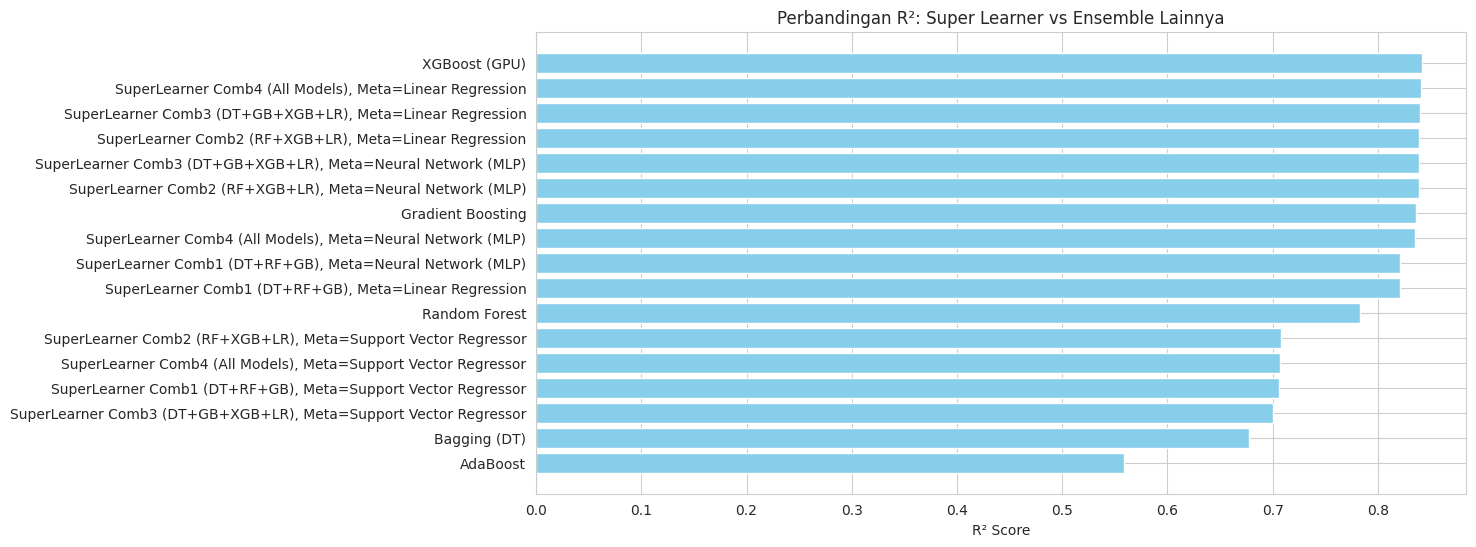

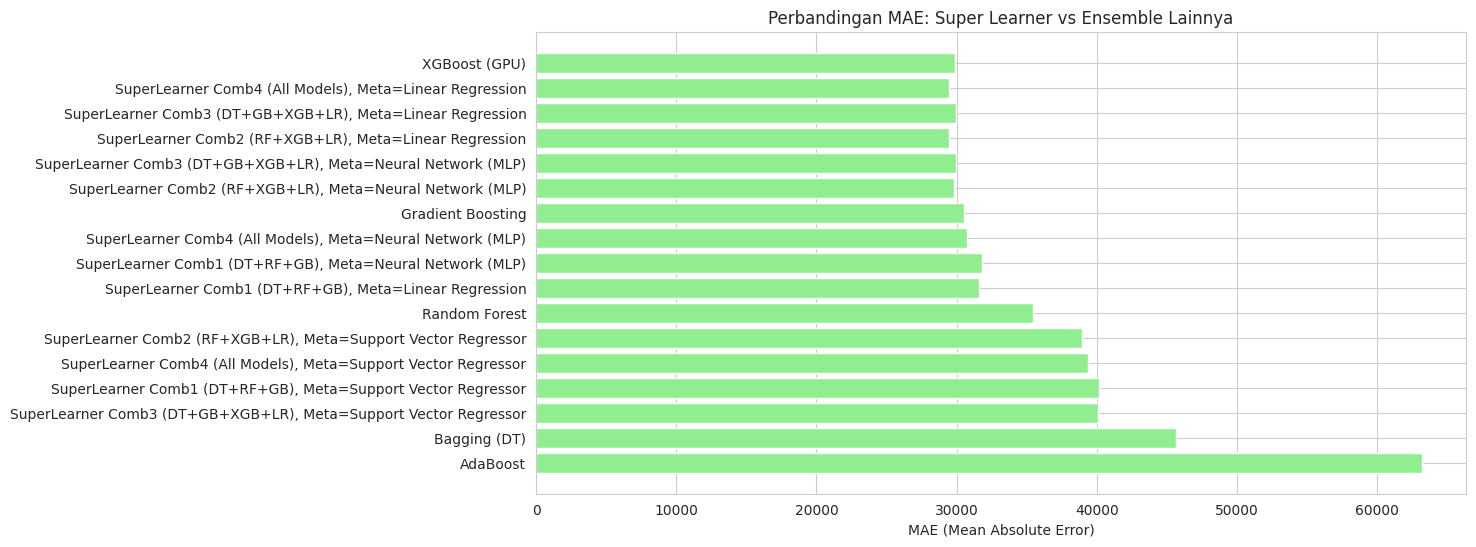

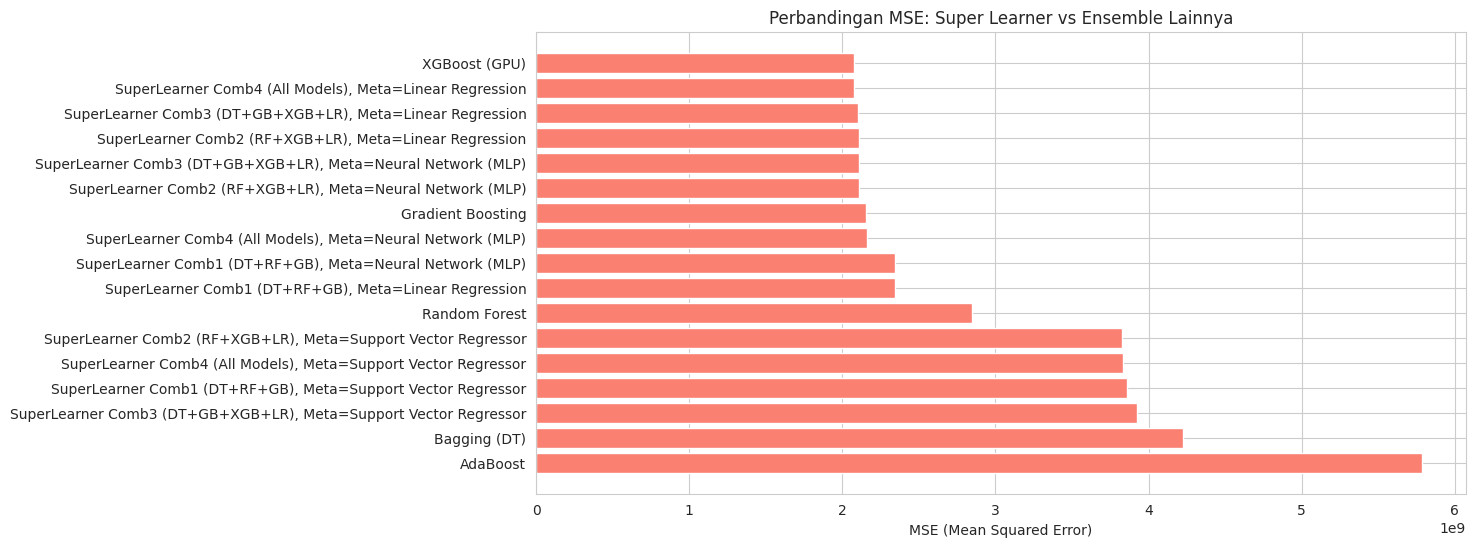

In [24]:
import matplotlib.pyplot as plt

# --- Pastikan results_df sudah ada dari eksperimen ---
# Urutkan supaya model terbaik terlihat jelas
results_sorted = results_df.sort_values(by="R2", ascending=False)

# Plot R² Score
plt.figure(figsize=(12,6))
plt.barh(results_sorted["Model"], results_sorted["R2"], color="skyblue")
plt.xlabel("R² Score")
plt.title("Perbandingan R²: Super Learner vs Ensemble Lainnya")
plt.gca().invert_yaxis()
plt.show()

# Plot MAE
plt.figure(figsize=(12,6))
plt.barh(results_sorted["Model"], results_sorted["MAE"], color="lightgreen")
plt.xlabel("MAE (Mean Absolute Error)")
plt.title("Perbandingan MAE: Super Learner vs Ensemble Lainnya")
plt.gca().invert_yaxis()
plt.show()

# Plot MSE
plt.figure(figsize=(12,6))
plt.barh(results_sorted["Model"], results_sorted["MSE"], color="salmon")
plt.xlabel("MSE (Mean Squared Error)")
plt.title("Perbandingan MSE: Super Learner vs Ensemble Lainnya")
plt.gca().invert_yaxis()
plt.show()
